In [28]:
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your JSON is in a file named 'graph.json'
data = json.load(open('hackHPI-parser/output.json'))

graph = data['graph']
buildings = data['buildings']
buildings_df = pd.DataFrame(buildings)
areas = data['areas']
areas_df = pd.DataFrame(areas)
roads = data['roads']
roads_df = pd.DataFrame(roads)

In [29]:
buildings_df

,id,center,type,base_area,area,winter_consumption,summer_consumption
0,0,"{'lat': 52.39041541666666, 'lon': 13.09000075}",high_density_residential,172.561700,862.808500,"{'min_electro': 0.9570370157182168, 'max_elect...","{'min_electro': 0.6211081327791695, 'max_elect..."
1,1,"{'lat': 52.42403414, 'lon': 13.0447046}",residential,81.555491,163.110982,"{'min_electro': 0.12325691672380237, 'max_elec...","{'min_electro': 0.11945240797649576, 'max_elec..."
2,2,"{'lat': 52.42147563333333, 'lon': 13.010573883...",residential,92.319449,276.958348,"{'min_electro': 0.2092871463636807, 'max_elect...","{'min_electro': 0.2028271861423514, 'max_elect..."
3,3,"{'lat': 52.36391146666667, 'lon': 13.129913266...",residential,353.542108,1060.626323,"{'min_electro': 0.8014759546484898, 'max_elect...","{'min_electro': 0.776737202769365, 'max_electr..."
4,4,"{'lat': 52.462287360000005, 'lon': 13.09967136...",residential,24.678551,74.035653,"{'min_electro': 0.055945995824756456, 'max_ele...","{'min_electro': 0.054219139140769965, 'max_ele..."
...,...,...,...,...,...,...,...
34917,34917,"{'lat': 52.43243954, 'lon': 12.957635540000002}",residential,36.174987,108.524962,"{'min_electro': 0.08200828634808467, 'max_elec...","{'min_electro': 0.07947697815819985, 'max_elec..."
34918,34918,"{'lat': 52.404870700000004, 'lon': 12.96143912}",residential,75.013977,225.041931,"{'min_electro': 0.1700558363154911, 'max_elect...","{'min_electro': 0.164806809047978, 'max_electr..."
34919,34919,"{'lat': 52.41352668, 'lon': 13.048556780000002}",high_density_residential,189.984163,569.952490,"{'min_electro': 0.6321977944593697, 'max_elect...","{'min_electro': 0.41029049578515087, 'max_elec..."
34920,34920,"{'lat': 52.39462754, 'lon': 13.031039340000001}",transport,16.565154,49.695462,"{'min_electro': 0.06714682091333203, 'max_elec...","{'min_electro': 0.043778543894896695, 'max_ele..."


In [30]:
buildings_df['lon'] = buildings_df['center'].apply(lambda x: x['lon'])
buildings_df['lat'] = buildings_df['center'].apply(lambda x: x['lat'])

areas_df['lon'] = areas_df['center'].apply(lambda x: x['lon'])
areas_df['lat'] = areas_df['center'].apply(lambda x: x['lat'])

roads_df['lon'] = roads_df['point'].apply(lambda x: x['lon'])
roads_df['lat'] = roads_df['point'].apply(lambda x: x['lat'])

In [31]:
len(buildings_df), len(areas_df), len(roads_df)

(34922, 2928, 51948)

In [32]:
edges = []
for node in graph:
    for neighbor in node['children']:
        edges.append((node, neighbor))

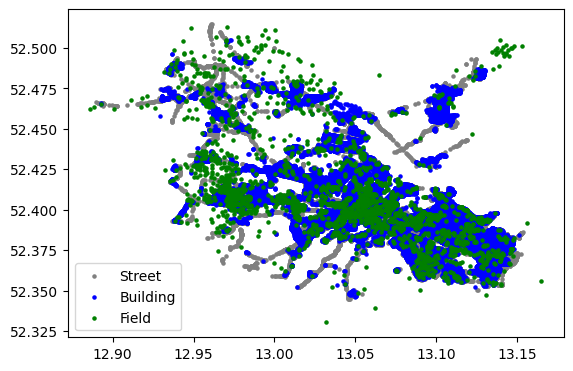

In [33]:
# Convert DataFrame to GeoDataFrame
buildings_gdf = gpd.GeoDataFrame(buildings_df, geometry=gpd.points_from_xy(buildings_df.lon, buildings_df.lat))
areas_gdf = gpd.GeoDataFrame(areas_df, geometry=gpd.points_from_xy(areas_df.lon, areas_df.lat))
roads_gdf = gpd.GeoDataFrame(roads_df, geometry=gpd.points_from_xy(roads_df.lon, roads_df.lat))

# Plot the points
fig, ax = plt.subplots()

# Plot the points on the same axis
roads_gdf.plot(marker='o', color='gray', markersize=5, ax=ax, label='Street')
buildings_gdf.plot(marker='o', color='b', markersize=5, ax=ax, label='Building')
areas_gdf.plot(marker='o', color='g', markersize=5, ax=ax, label='Field')

plt.legend()
plt.show()

In [34]:
clusters = json.load(open('clusters.json'))
clusters_df = pd.DataFrame(clusters)
# add id column
clusters_df['cluster_id'] = clusters_df.index

# Assuming buildings_df has a 'nodeId' column
# Convert the list of nodeIds in each cluster to separate rows
clusters_df = clusters_df.explode('nodes')
clusters_df

,center,nodes,cluster_id
0,"[52.385146283388856, 13.107729461018952]",46,0
0,"[52.385146283388856, 13.107729461018952]",47,0
0,"[52.385146283388856, 13.107729461018952]",91,0
0,"[52.385146283388856, 13.107729461018952]",124,0
0,"[52.385146283388856, 13.107729461018952]",136,0
...,...,...,...
49,"[52.40640106634405, 12.967136941940787]",34771,49
49,"[52.40640106634405, 12.967136941940787]",34858,49
49,"[52.40640106634405, 12.967136941940787]",34881,49
49,"[52.40640106634405, 12.967136941940787]",34912,49


In [35]:
# Merge clusters_df with buildings_df on nodeId
merged_df = pd.merge(clusters_df, buildings_df, left_on='nodes', right_on='id')
merged_df

,center_x,nodes,cluster_id,id,center_y,type,base_area,area,winter_consumption,summer_consumption,lon,lat
0,"[52.385146283388856, 13.107729461018952]",46,0,46,"{'lat': 52.38129147142856, 'lon': 13.107050342...",residential,75.283532,225.850597,"{'min_electro': 0.1706669150175296, 'max_elect...","{'min_electro': 0.1653990258935869, 'max_elect...",13.107050,52.381291
1,"[52.385146283388856, 13.107729461018952]",47,0,47,"{'lat': 52.38305915555556, 'lon': 13.106778388...",residential,86.497125,172.994251,"{'min_electro': 0.13072533585559026, 'max_elec...","{'min_electro': 0.12669030320203414, 'max_elec...",13.106778,52.383059
2,"[52.385146283388856, 13.107729461018952]",91,0,91,"{'lat': 52.39198936250001, 'lon': 13.1074110875}",residential,53.811127,161.433382,"{'min_electro': 0.12198921655228971, 'max_elec...","{'min_electro': 0.11822383726335085, 'max_elec...",13.107411,52.391989
3,"[52.385146283388856, 13.107729461018952]",124,0,124,"{'lat': 52.38535763749999, 'lon': 13.1025442125}",commercial,289.038375,867.115124,"{'min_electro': 6.960713120489964, 'max_electr...","{'min_electro': 10.008704175737366, 'max_elect...",13.102544,52.385358
4,"[52.385146283388856, 13.107729461018952]",136,0,136,"{'lat': 52.38706922, 'lon': 13.11598478}",retail,139.147496,139.147496,"{'min_electro': 0.7231057549472579, 'max_elect...","{'min_electro': 0.5806838721012553, 'max_elect...",13.115985,52.387069
...,...,...,...,...,...,...,...,...,...,...,...,...
34917,"[52.40640106634405, 12.967136941940787]",34771,49,34771,"{'lat': 52.40670288333333, 'lon': 12.966328433...",residential,170.978711,512.936133,"{'min_electro': 0.3876068021982754, 'max_elect...","{'min_electro': 0.37564273958276045, 'max_elec...",12.966328,52.406703
34918,"[52.40640106634405, 12.967136941940787]",34858,49,34858,"{'lat': 52.413249740000005, 'lon': 12.95454074...",residential,45.382501,136.147502,"{'min_electro': 0.10288161497800981, 'max_elec...","{'min_electro': 0.09970602033776775, 'max_elec...",12.954541,52.413250
34919,"[52.40640106634405, 12.967136941940787]",34881,49,34881,"{'lat': 52.40811051666666, 'lon': 12.96686915}",residential,150.141684,450.425053,"{'min_electro': 0.34036949810977696, 'max_elec...","{'min_electro': 0.3298634854064352, 'max_elect...",12.966869,52.408111
34920,"[52.40640106634405, 12.967136941940787]",34912,49,34912,"{'lat': 52.407649000000006, 'lon': 12.96373968}",residential,109.289198,327.867595,"{'min_electro': 0.24775737491816505, 'max_elec...","{'min_electro': 0.24010997365955594, 'max_elec...",12.963740,52.407649


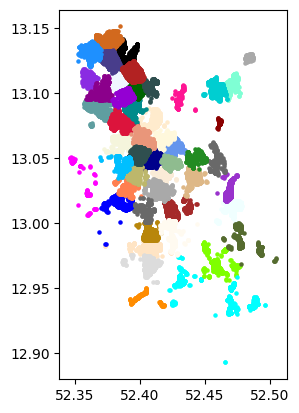

In [36]:


import matplotlib.colors as mcolors

# Convert merged DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df.lat, merged_df.lon))

# Create a new figure and axis
fig, ax = plt.subplots()

# Get a list of unique colors
colors = list(mcolors.CSS4_COLORS.keys())

# Plot each cluster with a different color
for i, cluster in enumerate(gdf['cluster_id'].unique()):
    gdf[gdf['cluster_id'] == cluster].plot(marker='o', color=colors[i % len(colors)], markersize=5, ax=ax, label=f'Cluster {cluster}')

#plt.legend()
plt.show()

In [40]:
buildings_df.iloc[0]['winter_consumption']

{'min_electro': 0.9570370157182168,
 'max_electro': 4.398682515181907,
 'avg_electro': 2.807540468295446,
 'min_heating': 12.016943487169597,
 'max_heating': 30.945185586426085,
 'avg_heating': 20.376992083785712,
 'consumption': {'Electro': [1.2219830494351287,
   1.1365559449766776,
   1.0263997668924938,
   0.9570370157182168,
   0.9696936909730745,
   1.1010094241686694,
   1.184012680342814,
   2.1664046172236886,
   3.0316617244509594,
   3.3550480467131636,
   3.6051892418654754,
   4.046061594258889,
   4.201331437157908,
   4.131083755364729,
   3.69748428261189,
   3.4784565129549736,
   3.474438502670724,
   3.545282772666995,
   4.198092628693897,
   4.398682515181907,
   4.265920673423269,
   3.5284949033382818,
   2.7472784560457715,
   1.9133680019611081],
  'Heating': [12.323668372344686,
   13.403803292034707,
   15.097834095614836,
   14.807104326730164,
   21.535919295509046,
   30.945185586426085,
   28.802461275018235,
   24.68555883766437,
   21.84562343573813,
  